In [47]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [48]:
#Importing Biases
path = '/Users/mmdallas/Desktop/lsa-ast361/Work/mmdallas/lab6/DataLab_6/DownloadedData/' #Filepath to the folder containing your data

biases = [] 
for i in range(45,55): 
    biases.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))

avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements   

In [59]:
#Importing Lamps for neon and helium
lamp_on_neon  = [] 
for i in range(58,61): 
    lamp_on_neon.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))

lamp_on_helium  = [] 
for i in range(61,63): 
    lamp_on_helium.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))

#Importing Background for neon and helium 
lamp_off = []
for i in range(55,58): 
    lamp_off.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
    
#Importing Exposure and Background for Sun
sun_on  = []
for i in range(63,66): 
    sun_on.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))

sun_off  = [] #We accidentally took dark frames for our background but the sun is so bright it shouldn't make that much of a difference between subtracting darks and backgrounds here
for i in range(66,69): 
    sun_off.append(fits.getdata(path+'nov_7Dark'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))

In [56]:
#Subtracting bias from background for neon and helium    
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]

#Averaging corrected background for neon and helium
avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)

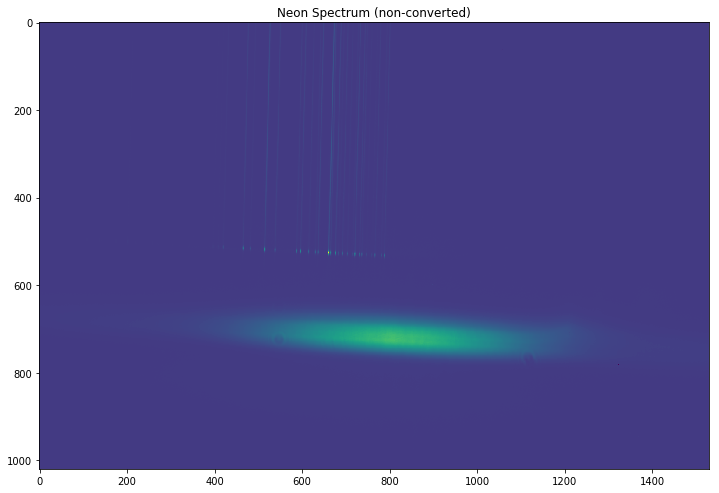

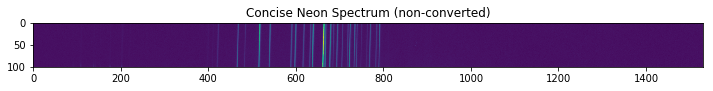

In [119]:
#Subtracting bias from lamp for neon 
lamp_on_neon_sub_bias = [lamp_neon - avg_bias for lamp_neon in lamp_on_neon]

#Subtracting background from lamp for neon
lamp_neon_corrected = [lamp_on_neon - avg_lamp_off for lamp_on_neon in lamp_on_neon_sub_bias]

#Averaging corrected lamp for neon
avg_lamp_neon = np.asarray(lamp_neon_corrected).mean(axis=0)

#Plotting Neon Lamp Spectrum
plt.imshow(avg_lamp_neon)
plt.title('Neon Spectrum (non-converted)')
plt.show()

#Plotting Concise Neon Spectrum
plt.title('Concise Neon Spectrum (non-converted)')
plt.imshow(avg_lamp_neon[400:500,:])
plt.show()

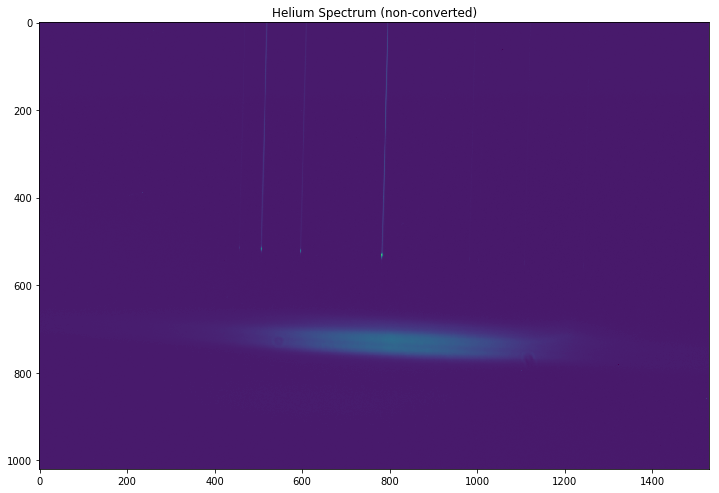

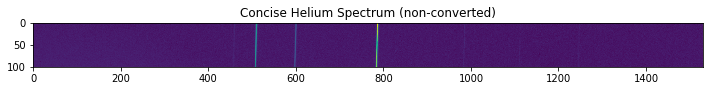

In [118]:
#Subtracting bias from lamp for helium
lamp_on_helium_sub_bias = [lamp_helium - avg_bias for lamp_helium in lamp_on_helium]

#Subtracting background from lamp for helium
lamp_helium_corrected = [lamp_on_helium - avg_lamp_off for lamp_on_helium in lamp_on_helium_sub_bias]

#Averaging corrected lamp for helium
avg_lamp_helium = np.asarray(lamp_helium_corrected).mean(axis=0)

#Plotting Helium Lamp Spectrum
plt.imshow(avg_lamp_helium)
plt.title('Helium Spectrum (non-converted)')
plt.show()

#Plotting Concise Helium Lamp Spectrum
plt.imshow(avg_lamp_helium[400:500,:])
plt.title('Concise Helium Spectrum (non-converted)')
plt.show()

In [53]:
#Subtracting bias from exposure for sun
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]

#Subtracting bias from exposure for backround of sun
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

#Averaging corrected background for sun
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

#Subtracting background from exposure for sun
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

#Averaging corrected exposure for neon and helium
avg_sun = np.asarray(sun_corrected).mean(axis=0)

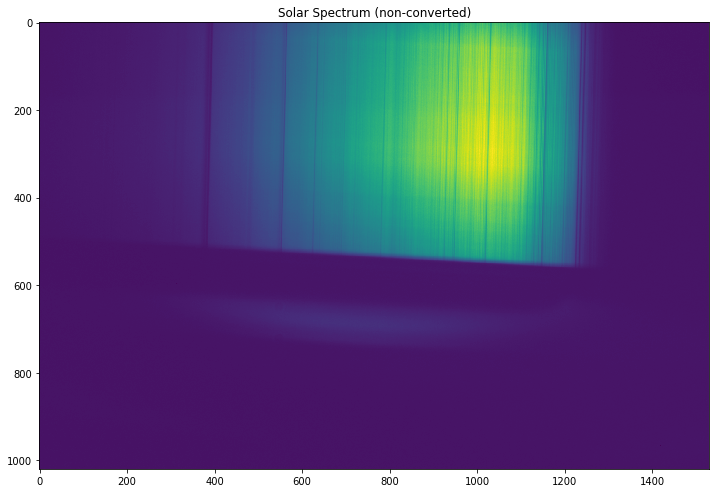

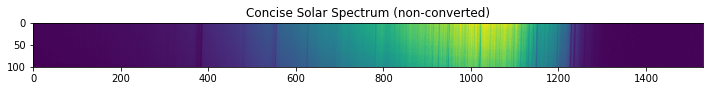

In [125]:
#Plotting Sun Spectrum
plt.imshow(avg_sun)
plt.title('Solar Spectrum (non-converted)')
plt.show()

#Plotting Concise Sun Spectrum
plt.imshow(avg_sun[400:500,:])
plt.title('Concise Solar Spectrum (non-converted)')
plt.show()

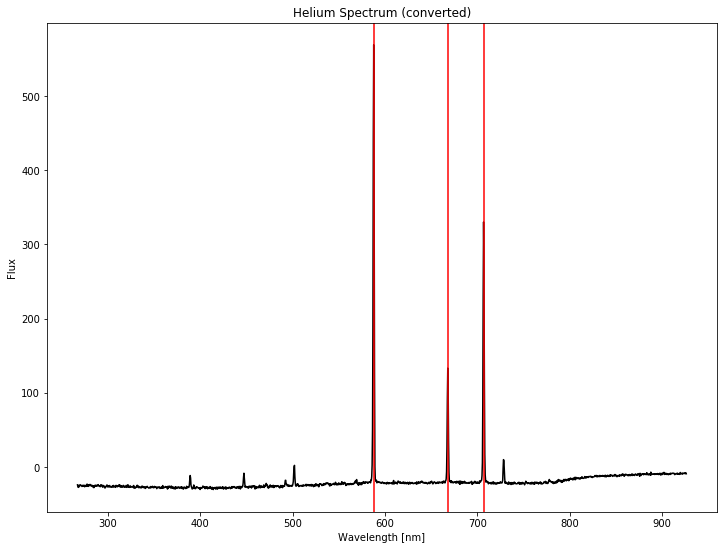

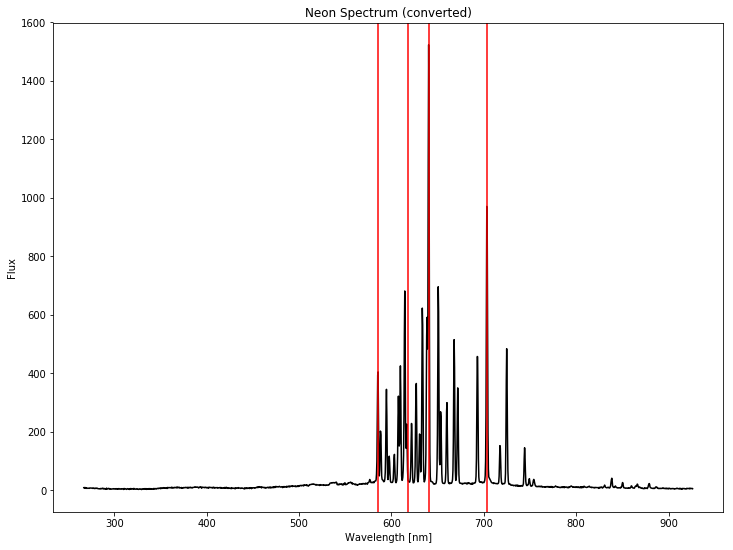

In [120]:
#Defining Concise Spectrums for Helium and Neon
lamp_neon_concise = np.asarray(avg_lamp_neon[400:500,:]).mean(axis=0)
lamp_helium_concise = np.asarray(avg_lamp_helium[400:500,:]).mean(axis=0)
sun_concise  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

#Putting Spectral Lines of Helium
helium_lines = [587.562,667.815,706.519]

#Finding Conversion Factor between CCD and Wavelength for Helium
plt.plot(np.flip(np.arange(len(lamp_helium_concise)),0)*0.431 +267, lamp_helium_concise, 'k-') 
for line in helium_lines:
    plt.axvline(line,color='r')
plt.title('Helium Spectrum (converted)')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()

#Putting Spectral Lines of Neon
neon_lines = [585.249,618.215,640.225,703.241]

#Finding Conversion Factor between CCD and Wavelength for Neon
plt.plot(np.flip(np.arange(len(lamp_neon_concise)),0)*0.431 +267, lamp_neon_concise, 'k-')
for line in neon_lines:
    plt.axvline(line,color='r')
plt.title('Neon Spectrum (converted)')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()

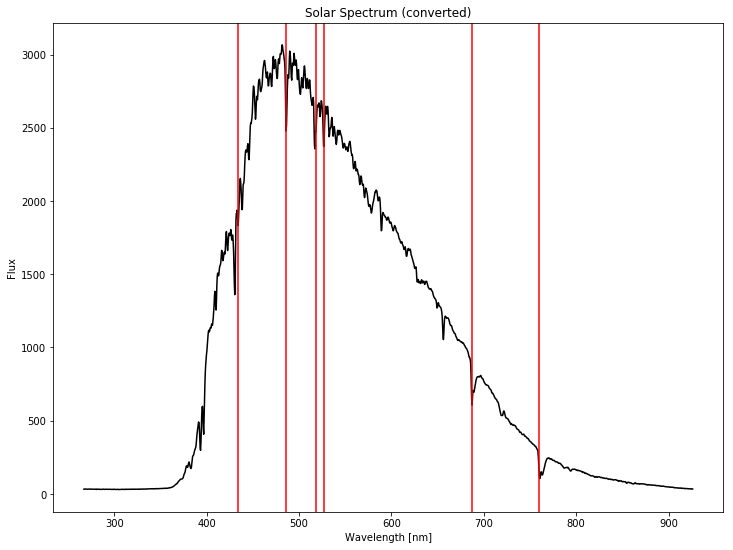

In [132]:
#Plotting Sun Spectrum
plt.plot(np.flip(np.arange(len(sun_concise)),0)*0.431 +267, sun_concise, 'k-') 
sun_lines = [434.05,486.134,518.362,527.039,686.72,759.37] #Lines from Fraunhauser Lines, in order: G',F,b1,E2,O2,O2

for line in sun_lines:
    plt.axvline(line,color='r')
plt.title('Solar Spectrum (converted)')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()